<a href="https://colab.research.google.com/github/victoriousvictor42/electic-car/blob/master/Autolib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This is a hypothesis testing that is being conducted for Autolib electric car-sharing service company.
We are investigating a claim about blue cars from the Autolib dataset.


In [0]:
# importing libraries that we will be working with
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

reading the data we have

In [0]:
df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
df2 = pd.read_excel('columns_explanation (1).xlsx')

getiing information about our dataset

In [88]:
df2

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [43]:
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [44]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [45]:
df.shape

(16085, 13)

In [46]:
# standardizing the columns names to
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

Sampling the data set using systematic random sampling


In [47]:
sample = df.sample(n=1500)
sample

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
11596,93350,4/19/2018,1203,3,weekday,18,22,1,1,0,0,0,0
5107,92130,5/2/2018,1440,2,weekday,288,277,13,13,15,12,5,5
2001,75013,5/24/2018,1436,3,weekday,511,496,20,19,39,39,176,170
10368,93130,4/3/2018,1440,1,weekday,39,38,0,0,0,2,0,0
8286,92360,1/31/2018,1440,2,weekday,8,9,1,1,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,92800,3/30/2018,1434,4,weekday,92,83,5,4,9,10,13,11
4619,92100,4/11/2018,1439,2,weekday,359,369,4,5,15,13,10,11
10018,93100,2/21/2018,1440,2,weekday,101,104,9,6,2,2,3,3
12154,93400,5/2/2018,1440,2,weekday,126,111,2,2,7,5,0,0


checking for anomalies in the sample 

In [48]:
# checking for missing values
sample.isnull().any().any()

False



> there are no existing missing values



In [49]:
# checking for duplicates
sample.duplicated().any()

False



> there ain't any duplicates in the dataset



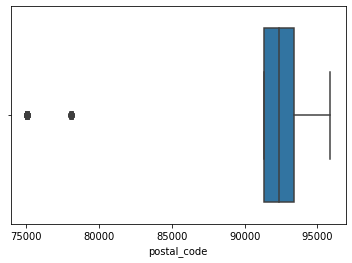

In [50]:
#checking for outliers
sns.boxplot(sample['postal_code'])
plt.show()

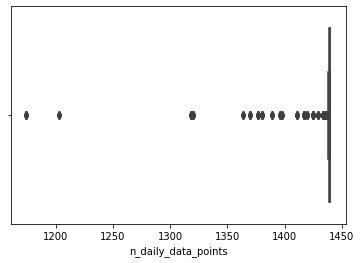

In [51]:
sns.boxplot(sample['n_daily_data_points'])
plt.show()

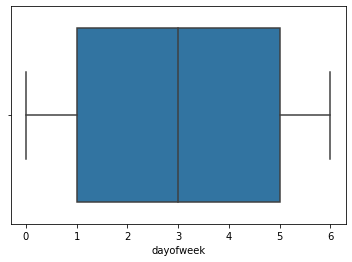

In [52]:
sns.boxplot(sample['dayofweek'])
plt.show()

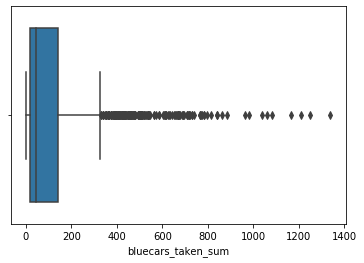

In [53]:
sns.boxplot(sample['bluecars_taken_sum'])
plt.show()

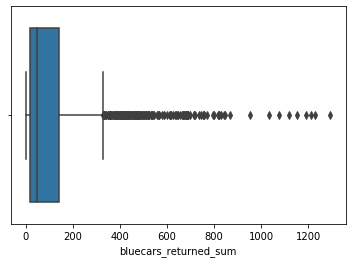

In [54]:
sns.boxplot(sample['bluecars_returned_sum'])
plt.show()

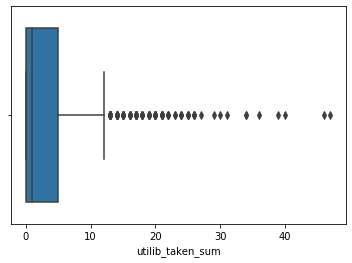

In [55]:
sns.boxplot(sample['utilib_taken_sum'])
plt.show()

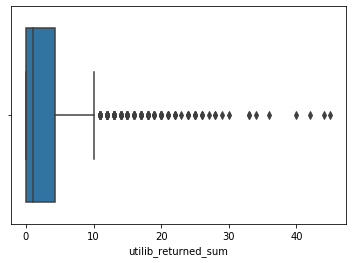

In [56]:
sns.boxplot(sample['utilib_returned_sum'])
plt.show()

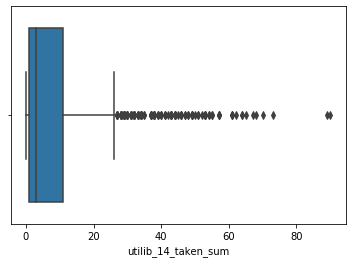

In [57]:
sns.boxplot(sample['utilib_14_taken_sum'])
plt.show()

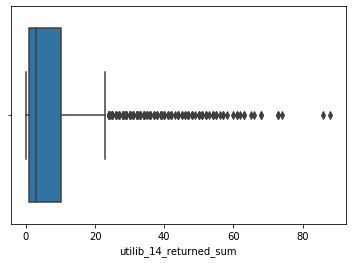

In [58]:
sns.boxplot(sample['utilib_14_returned_sum'])
plt.show()

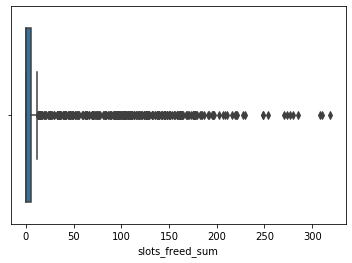

In [59]:
sns.boxplot(sample['slots_freed_sum'])
plt.show()

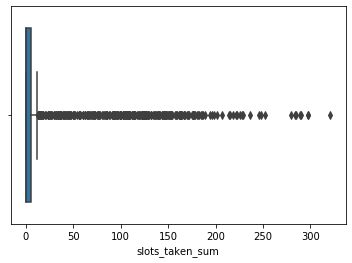

In [60]:
sns.boxplot(sample['slots_taken_sum'])
plt.show()

In [0]:
# labeling data on the categorical data so that we can check for outliers
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
sample['date'] = label.fit_transform(sample['date'])
sample['day_type'] = label.fit_transform(sample['day_type'])

In [62]:
# checking whether labelling has been applied to our dataset
print(df.date.unique())
print(df.day_type.unique())

['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/25/2018' '1/26/2018' '1/27/2018' '1/28/2018' '1/29/2018' '1/30/2018'
 '1/31/2018' '2/1/2018' '2/2/2018' '2/3/2018' '2/4/2018' '2/5/2018'
 '2/6/2018' '2/7/2018' '2/8/2018' '2/9/2018' '2/10/2018' '2/11/2018'
 '2/12/2018' '2/13/2018' '2/14/2018' '2/15/2018' '2/16/2018' '2/17/2018'
 '2/18/2018' '2/19/2018' '2/20/2018' '2/21/2018' '2/22/2018' '2/23/2018'
 '2/24/2018' '2/28/2018' '3/1/2018' '3/2/2018' '3/3/2018' '3/4/2018'
 '3/5/2018' '3/6/2018' '3/7/2018' '3/8/2018' '3/9/2018' '3/10/2018'
 '3/11/2018' '3/12/2018' '3/13/2018' '3/14/2018' '3/15/2018' '3/16/2018'
 '3/17/2018' '3/18/2018' '3/19/2018' '3/20/2018' '3/21/2018' '3/22/2018'
 '3/23/2018' '3/24/2018' '3/25/2018' '3/26/2018' '3/27/2018' '3/28/2018'
 '3/2

In [63]:
sample.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

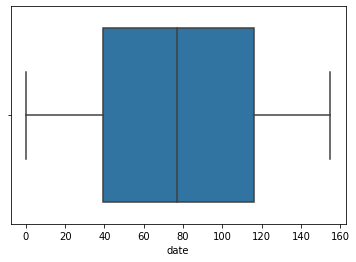

In [64]:
sns.boxplot(sample['date'])
plt.show()

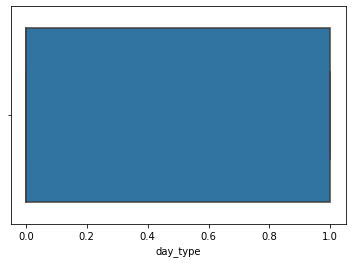

In [65]:
sns.boxplot(sample['day_type'])
plt.show()



> we confrim that there are outliers in the following columns

*   postal code
*   number of daily data points
*   bluecars taken sum
*   bluecars returned sum
*   utilib taken sum
*   utilib returned sum
*   utilib 14 taken sum
*   utilib 14 returned sum
*   slots freed sum
*   slots taken item














**Dealing with anomalies**



> removing the outliers in the dataset using z-score



In [66]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(sample))
print(z)

[[0.59328644 0.43867644 6.86646434 ... 0.67816493 0.44082864 0.43961179]
 [0.43481481 0.90836739 0.27448984 ... 0.2571633  0.3438039  0.34295416]
 [1.78859413 1.02019857 0.15396741 ... 2.36165183 2.97444193 2.84674762]
 ...
 [0.56081274 0.74673406 0.27448984 ... 0.52227689 0.3826138  0.38161721]
 [0.59978118 0.90836739 0.27448984 ... 0.28844484 0.44082864 0.43961179]
 [0.46339166 1.44008737 0.27448984 ... 0.52227689 0.44082864 0.43961179]]


In [67]:
threshold = 3
print(np.where(z > 3))

(array([   0,    9,   14,   14,   19,   19,   42,   46,   58,  120,  123,
        123,  123,  123,  123,  123,  136,  151,  151,  151,  151,  151,
        151,  151,  151,  167,  167,  167,  167,  167,  167,  170,  170,
        170,  170,  170,  170,  179,  196,  212,  212,  212,  212,  212,
        212,  215,  215,  215,  215,  244,  244,  325,  325,  325,  341,
        341,  363,  363,  363,  372,  399,  399,  414,  426,  426,  431,
        434,  485,  485,  485,  492,  529,  529,  529,  540,  540,  540,
        540,  540,  540,  543,  543,  547,  547,  547,  547,  547,  547,
        547,  557,  557,  561,  561,  561,  561,  563,  563,  563,  563,
        563,  563,  571,  571,  571,  571,  571,  571,  571,  571,  576,
        592,  592,  592,  592,  592,  592,  592,  592,  598,  603,  603,
        603,  603,  603,  603,  603,  603,  608,  608,  610,  610,  655,
        667,  667,  667,  667,  667,  667,  676,  676,  677,  681,  681,
        681,  681,  681,  681,  681,  709,  709,  

In [68]:
sample1 = sample[(z < 3).all(axis=1)]
print(sample.shape)
print(sample1.shape)

(1500, 13)
(1390, 13)




> As you can see, the outliers have been removed. The rows have been reduced from 1500 to 1395.



**Explanatory Data Analysis**

we are conducting an EDA on the dataset so as to get intresting facts about it.



> we are going to start with the blue car variables since thats where the claim is based on. 



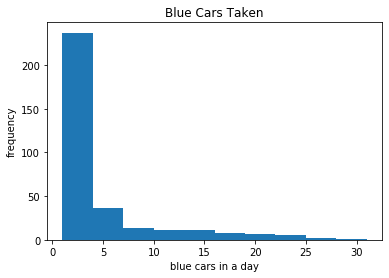

In [77]:
sample1['bluecars_taken_sum'].value_counts().plot.hist()
plt.ylabel('frequency')
plt.xlabel('blue cars in a day')
plt.title('Blue Cars Taken')
plt.show()



> The distribution shows that a lot of blue cars are taken are from the range of one to four in a day



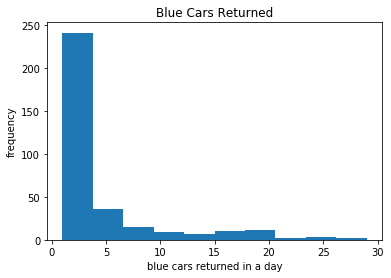

In [76]:
sample1['bluecars_returned_sum'].value_counts().plot.hist()
plt.ylabel('frequency')
plt.xlabel('blue cars returned in a day')
plt.title('Blue Cars Returned')
plt.show()



> The distribution shows that a lot of blue cars are returned are from the range of one to four in a day





We are going next for the postal codes since they rise some interest in our hypothesis



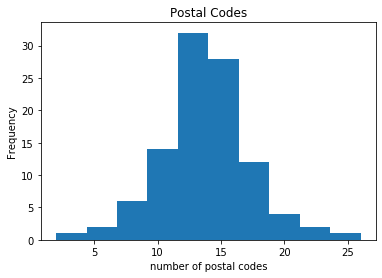

In [85]:
sample1.postal_code.value_counts().plot.hist()
plt.xlabel('number of postal codes')
plt.ylabel('Frequency')
plt.title('Postal Codes')
plt.show()



> the distribution shows that there are very many postal codes between 9 and 19



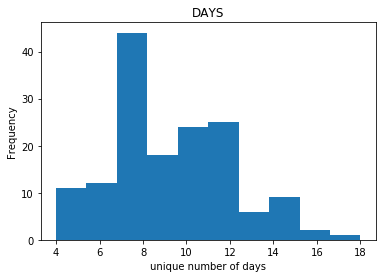

In [95]:
sample1.date.value_counts().plot.hist()
plt.ylabel('Frequency')
plt.xlabel('unique number of days')
plt.title('DAYS')
plt.show()



> there are mostly 7 to 13 days that vehicles are normally taken or returned, according to the distribution



Daily points given in a day can also show give a good insight about the data

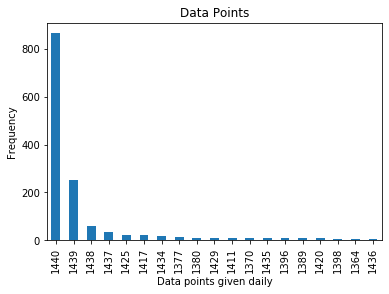

In [105]:
sample1.n_daily_data_points.value_counts().plot.bar()
plt.xlabel("Data points given daily")
plt.ylabel("Frequency")
plt.title('Data Points')
plt.show()



> 1440 is the most given data point on a daily basis



In [69]:
sample1.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

utilib taken also rises some interest

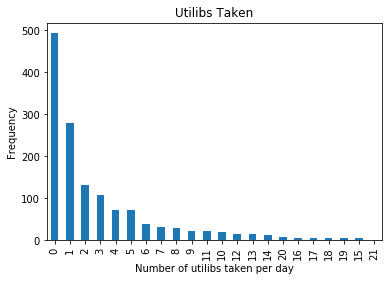

In [114]:
sample1.utilib_taken_sum.value_counts().plot.bar()
plt.xlabel('Number of utilibs taken per day')
plt.ylabel('Frequency')
plt.title('Utilibs Taken')
plt.show()



> utilibs are not taken in most cases



1/27/2018    104
2/4/2018     104
5/27/2018    104
5/6/2018     104
1/29/2018    104
            ... 
3/29/2018    102
3/13/2018    102
3/14/2018    101
2/24/2018     98
6/19/2018     94
Name: date, Length: 156, dtype: int64